# SPEECH EMOTION RECOGNITION

## Introduction
The purpose of this project is to train a neural network to recognize emotion in english human speech.

**Speech Emotion Recognition (SER)** will be defined to be the act of teaching a neural network to recognize and identify emotions, from a given number of emotions, found in english auditory phrases. The motivation is to mimic how humans can intepret additional meaning in phrases which is not always reflected in the definition of the words in that sentence.

We will be comparing the performance of two models. The first model is a **LSTM (Long Short-Term Memory)** model and the second model is a **CNN (Convolutional Neural Network)** model.

## Datasets
The main dataset that will be used throughtout this project is the dataset labelled **Speech Emotion Recognition (en)** compiled by **Dmitry Babko** which can be found [here](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en) on **[kaggle](https://www.kaggle.com/)**.
It is a combination of four popular datasets which are labelled **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset), **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song), **SAVEE** (Surrey Audio-Visual Expressed Emotion) and **TESS** (Toronto Emotional Speech Set).

## Exploratory Analysis of Data
Let us retrieve the data from these datasets so that we can peform some preprocessing and feature extraction steps, before we input it to our models. Each dataset includes multiple auditory phrases which are spoken in the different emotions and are the .wav file format.

In the **CREMA-D** dataset each file in structure in the following way: `1001_DFA_ANG_XX.wav`.

What we care about is the third bit, or in this case, `ANG`, which represents the emotion.

In this dataset there are 6 unique emotions which are as follows:
1. `ANG` - anger
2. `DIS` - disgust
3. `FEA` - fear
4. `HAP` - happiness
5. `NEU` - neutral
6. `SAD` - sadness

With this in mind let us now retrieve the **CREMA-D** dataset.

In [2]:
import os
import pandas as pd

crema_path = '../input/speech-emotion-recognition-en/Crema'

crema_to_emotion_dct = {
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happiness',
    'NEU': 'neutral',
    'SAD': 'sadness',
}

crema_paths = []

for file in os.listdir(crema_path):
    emotion = crema_to_emotion_dct[file.split('_')[2]]
    crema_paths.append((emotion, crema_path+'/'+file))

crema_df = pd.DataFrame.from_dict(crema_paths)
crema_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
crema_df.head()


,emotion,path
0,disgust,../input/speech-emotion-recognition-en/Crema/1...
1,happiness,../input/speech-emotion-recognition-en/Crema/1...
2,happiness,../input/speech-emotion-recognition-en/Crema/1...
3,disgust,../input/speech-emotion-recognition-en/Crema/1...
4,disgust,../input/speech-emotion-recognition-en/Crema/1...


In the **RAVDESS** dataset each file in structure in the following way: `02-01-06-01-02-01-12.wav`.

What we care about is the third bit, or in this case, `06`, which represents the emotion.

In this dataset there are 8 emotions which are as follows:
1. `01` - neutral
2. `02` - calm
3. `03` - happiness
4. `04` - sadness
5. `05` - anger
6. `06` - fear
7. `07` - disgust
8. `08` - surprise

However due to the similarities between calm and neutral, aswell as a widely accepted belief by psychologists, originally proposed by Paul Ekman, which suggests that "*...the six basic emotions are anger, disgust, fear, happiness, sadness, and surprise*", we will merge them to limit our emotions to the 6 aforementioned as well as no emotion, being neutral.

With this in mind let us now retrieve the **RAVDESS** dataset.

In [3]:
ravdess_path = '../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'

ravdess_to_emotion_dct = {
    '01': 'neutral',
    '02': 'neutral',
    '03': 'happiness',
    '04': 'sadness',
    '05': 'anger',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise',
}

ravdess_paths = []

for folder in os.listdir(ravdess_path):
    for file in os.listdir(ravdess_path+'/'+folder):
        emotion = ravdess_to_emotion_dct[file.split('-')[2]]
        ravdess_paths.append((emotion, ravdess_path+'/'+folder+'/'+file))

ravdess_df = pd.DataFrame.from_dict(ravdess_paths)
ravdess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
ravdess_df.head()

,emotion,path
0,surprise,../input/speech-emotion-recognition-en/Ravdess...
1,neutral,../input/speech-emotion-recognition-en/Ravdess...
2,disgust,../input/speech-emotion-recognition-en/Ravdess...
3,disgust,../input/speech-emotion-recognition-en/Ravdess...
4,neutral,../input/speech-emotion-recognition-en/Ravdess...


In the **SAVEE** dataset each file in structure in the following way: `DC_a01.wav`.

What we care about is the letter before the number, or in this case, `a`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `a` - anger
2. `d` - disgust
3. `f` - fear
4. `h` - happiness
5. `n` - neutral
6. `sa` - sadness
7. `su` - surprise

With this in mind let us now retrieve the **SAVEE** dataset.

In [4]:
savee_path = '../input/speech-emotion-recognition-en/Savee'

savee_to_emotion_dct = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise',
}

savee_paths = []

for file in os.listdir(savee_path):
    x = file.split('_')
    y = x[1][0:2] if x[1][0] == 's' else x[1][0]
    emotion = savee_to_emotion_dct[y]
    savee_paths.append((emotion, savee_path+'/'+file))

savee_df = pd.DataFrame.from_dict(savee_paths)
savee_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
savee_df.head()

,emotion,path
0,happiness,../input/speech-emotion-recognition-en/Savee/J...
1,fear,../input/speech-emotion-recognition-en/Savee/K...
2,happiness,../input/speech-emotion-recognition-en/Savee/D...
3,disgust,../input/speech-emotion-recognition-en/Savee/D...
4,anger,../input/speech-emotion-recognition-en/Savee/K...


In the **TESS** dataset each file in structure in the following way: `OAF_back_angry.wav`.

What we care about is the third bit, or in this case, `angry`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `angry` - anger
2. `disgust` - disgust
3. `fear` - fear
4. `happy` - happiness
5. `neutral` - neutral
6. `sad` - sadness
7. `ps` - surprise

With this in mind let us now retrieve the **TESS** dataset.

In [5]:
tess_path = '../input/speech-emotion-recognition-en/Tess'

tess_to_emotion_dct = {
    'angry': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happiness',
    'neutral': 'neutral',
    'ps': 'surprise', # pleasant surprise
    'sad': 'sadness',
}

tess_paths = []

for folder in os.listdir(tess_path):
    for file in os.listdir(tess_path+'/'+folder):
        emotion = tess_to_emotion_dct[file.split('.')[0].split('_')[2]]
        tess_paths.append((emotion, tess_path+'/'+folder+'/'+file))

tess_df = pd.DataFrame.from_dict(tess_paths)
tess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
tess_df.head()

,emotion,path
0,fear,../input/speech-emotion-recognition-en/Tess/YA...
1,fear,../input/speech-emotion-recognition-en/Tess/YA...
2,fear,../input/speech-emotion-recognition-en/Tess/YA...
3,fear,../input/speech-emotion-recognition-en/Tess/YA...
4,fear,../input/speech-emotion-recognition-en/Tess/YA...


Now let us join the dataframes into one collective dataframe.

(7442, 2)
(1440, 2)
(480, 2)
(2800, 2)

(12162, 2)



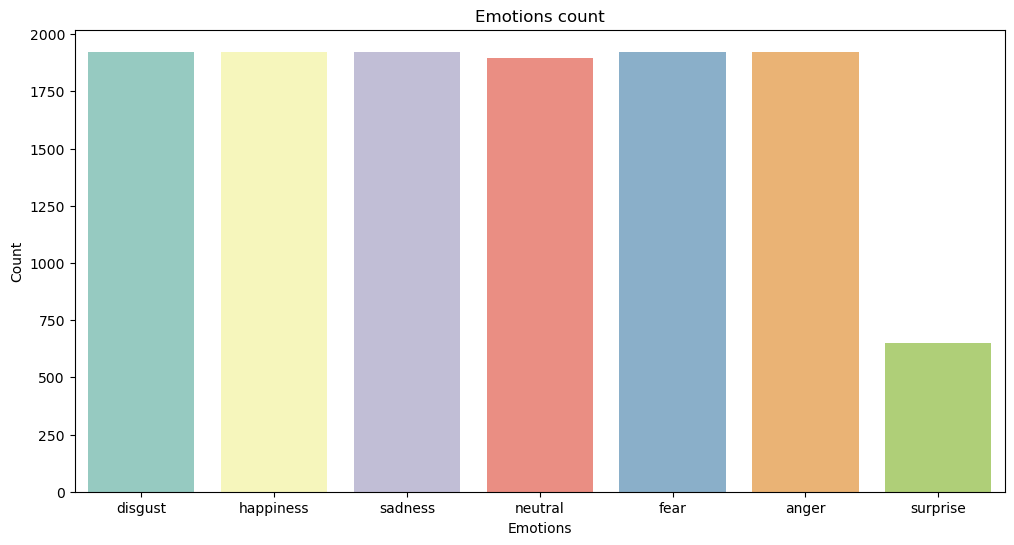

In [17]:
import matplotlib.pyplot as plt
import seaborn

print(crema_df.shape)
print(ravdess_df.shape)
print(savee_df.shape)
print(tess_df.shape)
print()

df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis=0)

print(df.shape)
print()

# Modified from: https://www.kaggle.com/code/lkergalipatak/speech-emotion-recognition-with-cnn?scriptVersionId=99779872&cellId=19
def plot_emotion_count(df):
    plt.figure(figsize=(12,6))
    plt.title('Emotions count')
    
    emotions = seaborn.countplot(x='emotion', data=df, palette='Set3')
    
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    
    return plt

plot_emotion_count(df).show()

So all together we have 12162 different audio files covering 7 unique emotions which we will train our models to recognize.

### Preprocessing
To correctly preprocess the data we must first undertake the challenge of understanding how humans convey emotion within their speech. We will propose that this can be done by observing the characterisitics of audio or sound. "*...the elements of sound should be listed separately as: pitch, duration, loudness, timbre, texture and spatial location*" (Russell Burton, 2015).

We would like to focus on pitch and duration as the key features to augment in each file. The reasoning being that not everyone has the same pitch, humans either have higher or lower voices and talk either faster or slower, changing the duration of the audio.

Another way to augment the audio will be to add noise to the sound. The idea behind this is to perhaps cover some of the audio with this noise to help the model identify when the actor is talking better.

The functions to augment the data are as follows.



In [6]:
import math
import numpy as np
import librosa

def add_noise(data):
    '''Signal to noise ratio is as follows: SNR = 2 * (A_signal - A_noise)
    according to the derivation on https://en.wikipedia.org/wiki/Signal-to-noise_ratio.'''
    A_signal = math.sqrt(np.mean(data**2))
    noise = np.random.normal(0, A_signal/3, data.shape)
    A_noise = math.sqrt(np.mean(noise**2))
    SNR = 2 * (A_signal - A_noise)
    return data + noise * SNR

def pitch_audio(data, sr, pitch_factor):
    '''A positive value increases the pitch, a negative value decreases it.
    For example, pitch_factor = 2.0 increases the pitch by 2 semitones (one octave).'''
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)

def stretch_audio(data):
    '''Stretch the data a certain amount.'''
    amount = np.random.random()
    amount = amount if amount > 0.45 else amount + 0.45 # want to make sure audio isn't too long
    stretched_data = librosa.effects.time_stretch(y=data, rate=amount)
    return librosa.util.fix_length(data=stretched_data, size=len(data))

Let us observe the effect this has on our data through analysing the waveform, spectrogram and listening to the audio itself.

To do this let us also create and import the following functions.

In [7]:
from IPython.display import Audio

# Modified from: https://www.kaggle.com/code/blitzapurv/speech-emotion-recognition-using-lstm?scriptVersionId=113306435&cellId=15
def generate_waveform(emotion, augmentation, filename, data, sr):
    '''Create a waveform with the data provided.'''
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} waveform | {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (% Scale)') # time - floating point
    librosa.display.waveshow(y=data, sr=sr)
    return plt

# Modified from: https://www.kaggle.com/code/blitzapurv/speech-emotion-recognition-using-lstm?scriptVersionId=113306435&cellId=15
def generate_spectrogram(emotion, augmentation, filename, data, sr):
    '''Create a spectrogram with the data provided.'''
    x = librosa.stft(data) # time - frequency domain
    xdB = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} spectrogram | {filename}')
    librosa.display.specshow(xdB, sr=sr, x_axis='time', y_axis='hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    cb = plt.colorbar()
    cb.set_label('Amplitude (dB)', rotation=270, labelpad=20)
    return plt

Now let us retrieve the audio we will be observing these changes on.

In [8]:
filename = df.iat[0,1]
emotion = df.iat[0,0]

Let us now view and listen to the audio.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


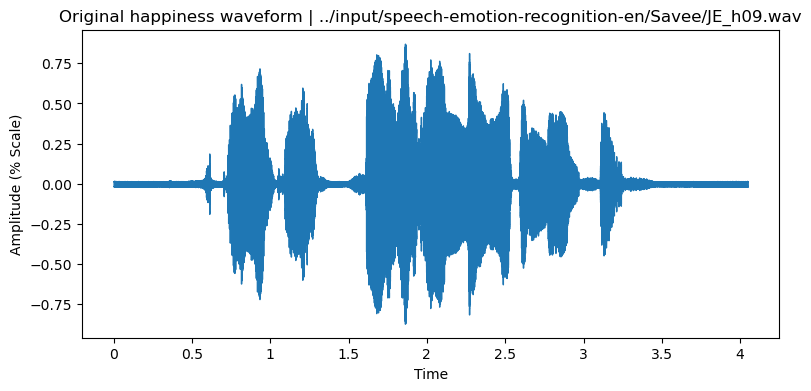

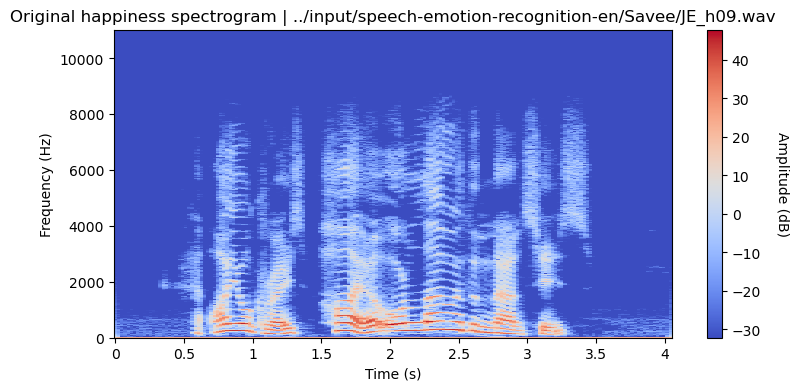

In [9]:
data, sr = librosa.load(filename)

generate_waveform(emotion, 'original', filename, data, sr).show()
print()
generate_spectrogram(emotion, 'original', filename, data, sr).show()
print()

Audio(data=data, rate=sr)

Let us perform the noise augmentation and observe the changes.

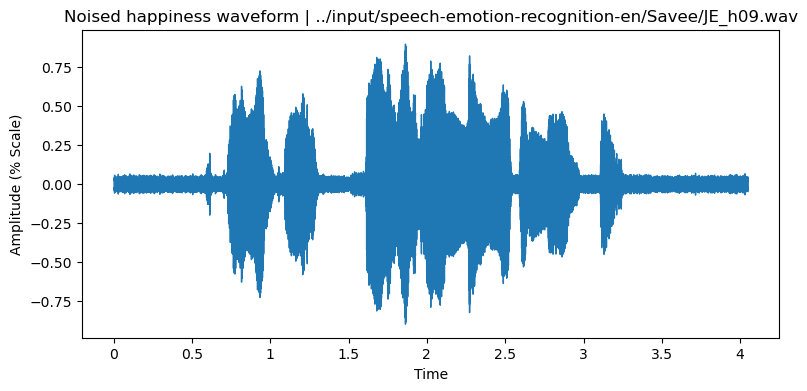

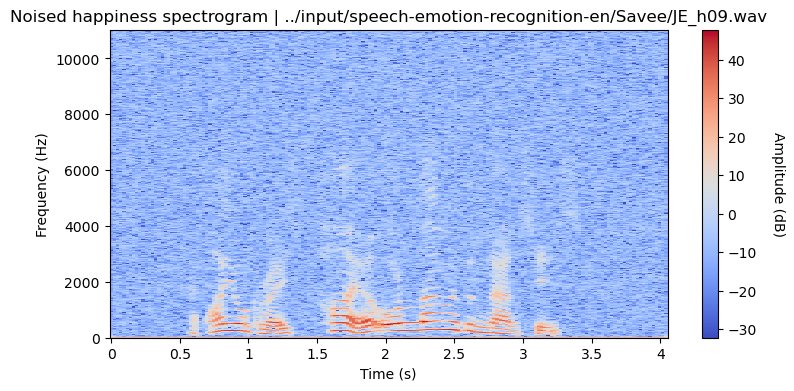

In [10]:
noised_data = add_noise(data)

generate_waveform(emotion, 'noised', filename, noised_data, sr).show()
print()
generate_spectrogram(emotion, 'noised', filename, noised_data, sr).show()
print()

Audio(data=noised_data, rate=sr)

Let us peform the pitch augmentation and observe the changes.

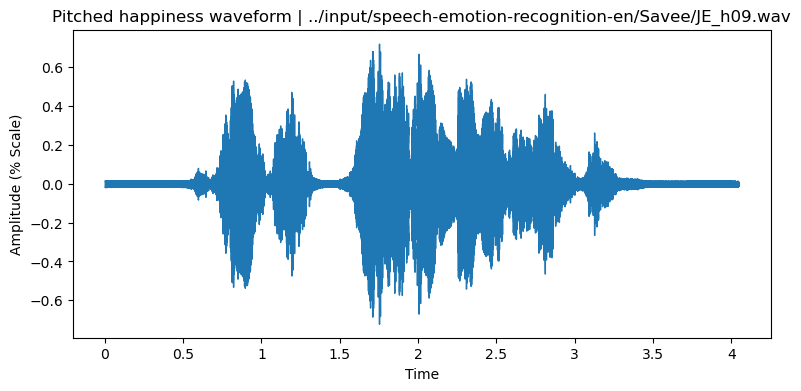

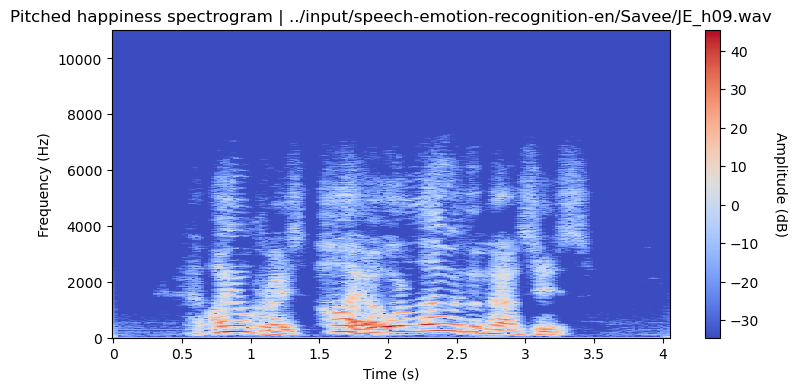

In [11]:
pitched_data = pitch_audio(data, sr, -3.0)

generate_waveform(emotion, 'pitched', filename, pitched_data, sr).show()
print()
generate_spectrogram(emotion, 'pitched', filename, pitched_data, sr).show()
print()

Audio(data=pitched_data, rate=sr)

Finally let us perform the stretch augmentation and observe the changes.

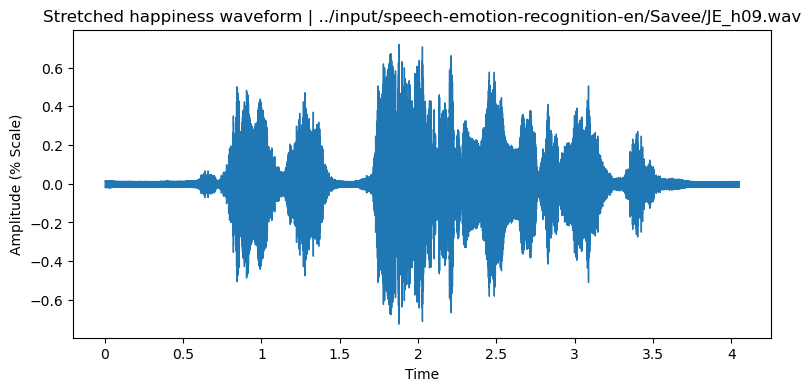

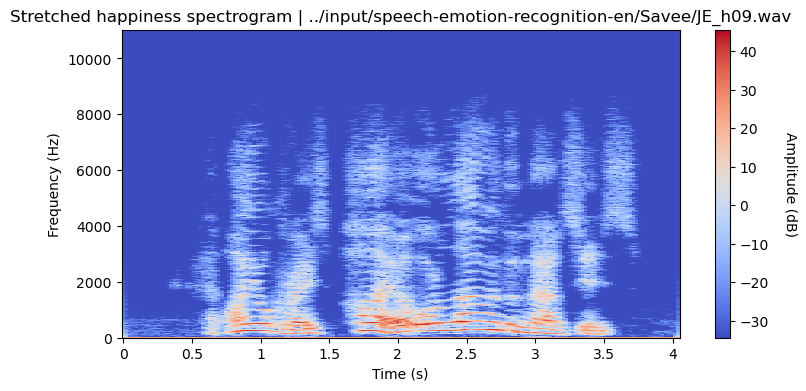

In [12]:
stretched_data = stretch_audio(data)

generate_waveform(emotion, 'stretched', filename, stretched_data, sr).show()
print()
generate_spectrogram(emotion, 'stretched', filename, stretched_data, sr).show()
print()

Audio(data=stretched_data, rate=sr)

To aid the model with it's learning, it would also be beneficial to extract key features from the audio and input those features to our model.

The features we will be abstracting are the following:
1. **MFCC (Mel Frequency Cepstral Coefficcients)** - Often used to describe timbre in MIR (Music Information Retrieval). As it is related to one of the characteristics of voice and sound, it will be useful when recognizing emotion.
2. **RMS (Root Mean Square)** - Used to describe intesity or amplitude of a sound wave. Emotions can often alter the loudness of one's voice so it will be useful to analyze.
3. **ZCR (Zero Crossing Rate)** - Detects the amount of times a sound wave changes between being positive and negative. Emotions can heighten or lessen this effect so it will be useful.
4. **F0 (Fundamental Frequency)** - "*perceived as pitch, [it] is the first and arguably most salient auditory component humans are exposed*" to and it conveys emotion within human speech, so it will be useful (Liquan Liu, 2022).
5. **Jitter** - Caused by irregular vocal cord vibration which disturbs the frequency of the sound, large irregularities can be correlated to emotion as the cause, which will make it useful for recognition.
6. **Shimmer** - The same as jitter but it disturbs the amplitude of the sound, so it will be useful.
7. **Speech Rate** - Emotions can cause one to talk faster or slower due to stress which will make this useful for identification.

The functions to extract this data are as follows.

In [13]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 71.0 MB/s eta 0:00:0000:010:01


In [14]:
import parselmouth

def extract_mfcc(data, sr,flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def extract_rms(data):
    return np.squeeze(librosa.feature.rms(y=data))

def extract_zcr(data):
    return np.squeeze(librosa.feature.zero_crossing_rate(data))

def extract_F0(data,sr):
    '''Extract F0 fundamental frequency from data.'''
    pitches, magnitudes = librosa.piptrack(y=data, sr=sr)
    return pitches[np.argmax(magnitudes, axis=0), np.arange(magnitudes.shape[1])]

# Modified from: https://programtalk.com/python-more-examples/parselmouth.praat.call/
def extract_jitter(filename):
    '''Extract frequency jitter from data.'''
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)

# Modified from: https://programtalk.com/python-more-examples/parselmouth.praat.call/
def extract_shimmer(filename):
    '''Extract amplitude shimmer from data.'''
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

def extract_speech_rate(data):
    return np.sum(librosa.zero_crossings(data)) / len(data)

Now that we have completed our data augmentation and feature extraction functions, we can now complete the preprocessing step by applying these function to each file in the collective dataframe.

However for each of the audios we can obtain a total of 12 different audios by combining all, some or none of our augmentations together.

They are as follows:
1. Original
2. Noised
3. Pitched higher
4. Pitched lower
5. Strecthed
6. Noised and pitched higher
7. Noised and pitched lower
8. Noised and stretched
9. Pitched higher and stretched
10. Pitched lower and stretched
11. Noised, pitched higher and stretched
12. Noised, pitched lower and stretched

First let us create a function to extract all of the features at once.

In [15]:
# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=48
def extract_features(data, sr, path):
    return np.hstack((np.array([]),
      extract_zcr(data),
      extract_rms(data),
      extract_mfcc(data, sr),
      extract_F0(data,sr),
      extract_jitter(path),
      extract_shimmer(path),
      extract_speech_rate(data)
      ))

Now let us extract all these feature from each of our augmented audios, including the original audio.

In [16]:
# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=50
def augment_data(df):
    '''Augments the data according to the afore defined functions, then extracts the necessary features from it.'''
    X, Y = [], []
    print("Preprocessing data")
    for path, emotion, i in zip(df.path, df.emotion, range(df.path.shape[0])):

        # original data
        duration=2.5
        offset=0.6
        data, sr = librosa.load(path, mono=False, sr=None, duration=duration, offset=offset)

        lst = []

        # 1 augmentation
        lst.append(add_noise(data)) # noised
        lst.append(pitch_audio(data, sr, pitch_factor=2.0)) # pitched higher
        lst.append(pitch_audio(data, sr, pitch_factor=-2.0)) # pitched lower
        lst.append(stretch_audio(data)) # stretched

        # 2 augmentations
        lst.append(add_noise(lst[2])) # noised pitched higher
        lst.append(add_noise(lst[3])) # noised pitched lower
        lst.append(add_noise(lst[4])) # noised stretched

        lst.append(stretch_audio(lst[2])) # pitched higher stretched
        lst.append(stretch_audio(lst[3])) # pitched lower stretched

        # 3 augmentations
        lst.append(add_noise(lst[8])) # noised pitched higher stretched
        lst.append(add_noise(lst[9])) # noised pitched lower stretched

        # process features
        features = np.array(extract_features(data, sr, path))
        for element in lst:
            features = np.vstack((features, extract_features(element, sr, path)))  # stacking vertically

        if i % 100 == 0:
            print(f"{i} files have been processed")

        for feature in features:
            X.append(feature)
            Y.append(emotion)

    print("Done")

    # convert to dataframe
    extracted_df = pd.DataFrame(X)
    extracted_df["emotion"] = Y
    extracted_df = extracted_df.fillna(0)

    # save features
    features_path = "./features.csv"
    extracted_df.to_csv(features_path, index=False)

    return extracted_df

In [17]:
processed_df = augment_data(df)

Preprocessing data
0 files have been processed
Done


In [18]:
processed_df.shape

(132, 4972)

In [19]:
processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4962,4963,4964,4965,4966,4967,4968,4969,4970,emotion
0,0.004883,0.006836,0.006836,0.003906,0.001953,0.000000,0.000000,0.001953,0.003906,0.010254,...,3988.448486,0.000000,3812.218018,3259.487793,0.000000,437.737701,0.019962,0.069187,0.019111,happiness
1,0.104492,0.203613,0.298340,0.382812,0.392090,0.387207,0.383789,0.343750,0.351074,0.313477,...,3974.922276,1254.559397,3817.499026,465.498206,3207.420460,0.000000,0.019962,0.069187,0.124771,happiness
2,0.004883,0.004883,0.004883,0.001465,0.000000,0.000000,0.001953,0.003418,0.010742,0.018555,...,0.000000,0.000000,0.000000,0.000000,0.000000,398.549042,0.019962,0.069187,0.022630,happiness
3,0.006836,0.006836,0.006836,0.004883,0.000000,0.000000,0.000000,0.000000,0.003418,0.009277,...,3815.549072,0.000000,0.000000,0.000000,0.000000,0.000000,0.019962,0.069187,0.015701,happiness
4,0.004883,0.004883,0.004883,0.001953,0.000000,0.000000,0.000000,0.001953,0.006836,0.011230,...,170.801422,170.994125,171.926544,172.331314,170.017044,167.501175,0.019962,0.069187,0.018476,happiness


The preprocessing is now complete.

We have a total of 7 emotion classes to train the models on, which are:
1. anger
2. disgust
3. fear
4. happiness
5. neutral
6. sadness
7. surprise

Now let us input the extracted features into the models.


## Models
We will be conducting a comparison between two models to decide which model performs this recognition task with greater accuracy.

The first model will be the LSTM (Long Short-Term Memory) model and the second model will be the CNN (Convolutional Neural Network) model.

The LSTM model was chosen as the first model since it "*...is able to learn long range dependencies using a combination of forget, input and output gates*" (Hochreiter & Schmidhuber, 1998). Thus for a time based recognition problem like this one, it can be applied.

The CNN Model was chosen as the second model since it "*...uses the already supplied dataset to it for training purposes, and predicts the possible future labels to be assigned*" and "*it processes all the layers, and hence detects all the underlying features, automatically*" (SSLA, 2013). Since our datasets are labelled, this is a prediction/recognition task and we have preprocessed a bunch of the audio's features, it can be applied.


First let us begin with transforming the preprocessed data, such that it can be provided to the models.

To do this let us first split our data into training and testing segments. We will use a standard split where 80% of our data will be used for testing and 20% will be used for evaluation. We will also shuffle the order of the data to avoid getting stuck in a local minimum. The `X` will be the extracted features from every piece of data and `Y` will be the emotion label for those pieces of data.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = processed_df.iloc[:, : -1]
Y = processed_df.iloc[:, -1]

lb = LabelEncoder()
Y = lb.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2, shuffle=True)

Let us also encode the `Y` labels to be an interger which is mapped to one of the seven emotion classes.

In [21]:
from keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_test_one_hot = to_categorical(Y_test, num_classes=7)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Now let us standardize our `X` data like so, to avoid errors within the models.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finally before we use the models let us define some callback functions which we can use to monitor the models.

An early stopping function can be used to stop training once we are happy with the results we are producing.


In [23]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', mode='auto', patience=5, restore_best_weights=True)

A reduce learning rate function can be used to help the function learn quicker at certain times.

In [24]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

Let's also define the batch size and number of epochs for both models.

In [25]:
epochs = 20
batch_size = 128

# LSTM Model

Let us now define our LSTM model as the following.

* The LSTM layers will be the layers which are mainly tasked with processing the data.
* The Dropout layers will prevent overfitting.
* The Flatten layer will turn the data into something the Dense layer can process.
* The BatchNormalization layer will be used to standardize our data further.
* And finally the Dense layers will be tasked with producing the final classification.

We will use the **rmsprop** optimizer due to it's fast convergence on large models. We will also use the **categorical cross-entropy** loss function also known as **softmax**, because of it's use for multiclass categorization and because we have one hot encoded our labels.

Here is the model below.

In [26]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Flatten
from keras.metrics import Recall, Precision

LSTM_model = Sequential()

LSTM_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(64, return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Flatten())
LSTM_model.add(Dense(64, activation='relu'))

LSTM_model.add(BatchNormalization())
LSTM_model.add(Dense(7, activation='softmax'))

LSTM_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4971, 128)         66560     
                                                                 
 dropout (Dropout)           (None, 4971, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 4971, 64)          49408     
                                                                 
 dropout_1 (Dropout)         (None, 4971, 64)          0         
                                                                 
 flatten (Flatten)           (None, 318144)            0         
                                                                 
 dense (Dense)               (None, 64)                20361280  
                                                                 
 batch_normalization (BatchN  (None, 64)               2

We will now run and save our LSTM model.

In [27]:
LSTM_output = LSTM_model.fit(X_train, Y_train_one_hot, validation_data=(X_test, Y_test_one_hot),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

LSTM_path = "./LSTM_model.h5"
LSTM_model.save(LSTM_path)

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 2.3328 - acc: 0.0857 - precision: 0.1250 - recall: 0.0095 - val_loss: 2.4178 - val_acc: 0.4444 - val_precision: 0.4444 - val_recall: 0.4444 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 1s 667ms/step - loss: 0.6061 - acc: 0.7619 - precision: 0.8125 - recall: 0.7429 - val_loss: 2.5117 - val_acc: 0.3704 - val_precision: 0.3462 - val_recall: 0.3333 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 1s 876ms/step - loss: 0.3182 - acc: 0.9429 - precision: 0.9674 - recall: 0.8476 - val_loss: 2.0311 - val_acc: 0.7407 - val_precision: 0.7407 - val_recall: 0.7407 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - 1s 874ms/step - loss: 0.3247 - acc: 0.8762 - precision: 0.9570 - recall: 0.8476 - val_loss: 1.3432 - val_acc: 0.7778 - val_precision: 0.8077 - val_recall: 0.7778 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 1s 875ms/step - loss: 0.1584 - acc: 0.9810 - precis

### CNN Model

Let us now define our CNN model as the following.

* The Conv1D layers will be the layers which are mainly tasked with processing the data.
* The BatchNormalization layers will be used to standardize our data further.
* The MaxPooling1D layers will reduce the size of our data.
* The Flatten layer will turn the data into something the Dense layer can process.
* And finally the Dense layers will be tasked with producing the final classification.

We will use the **rmsprop** optimizer due to it's fast convergence on large models. We will also use the **categorical cross-entropy** loss function also known as **softmax**, because of it's use for multiclass categorization and because we have one hot encoded our labels.

Here is the model below.

In [28]:
from keras.layers import Conv1D, MaxPooling1D

# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=68

CNN_model = Sequential()

CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))

CNN_model.add(BatchNormalization())
CNN_model.add(Dense(7, activation='softmax'))

CNN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4971, 512)         3072      
                                                                 
 batch_normalization_1 (Batc  (None, 4971, 512)        2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2486, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2486, 512)         1311232   
                                                                 
 batch_normalization_2 (Batc  (None, 2486, 512)        2048      
 hNormalization)                                                 
                                                      

We will now run and save our CNN model.

In [29]:
CNN_output = CNN_model.fit(X_train, Y_train_one_hot, validation_data=(X_test, Y_test_one_hot),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

CNN_path = "./CNN_model.h5"
CNN_model.save(CNN_path)

Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 2.9889 - acc: 0.1524 - precision_1: 0.1915 - recall_1: 0.0857 - val_loss: 6.4208 - val_acc: 0.3333 - val_precision_1: 0.3600 - val_recall_1: 0.3333 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 1s 619ms/step - loss: 1.3031 - acc: 0.6762 - precision_1: 0.7021 - recall_1: 0.6286 - val_loss: 24.6103 - val_acc: 0.1111 - val_precision_1: 0.1111 - val_recall_1: 0.1111 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 1s 638ms/step - loss: 1.0588 - acc: 0.7714 - precision_1: 0.7864 - recall_1: 0.7714 - val_loss: 15.3939 - val_acc: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 0.3333 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - 1s 749ms/step - loss: 0.6978 - acc: 0.8667 - precision_1: 0.8900 - recall_1: 0.8476 - val_loss: 7.8953 - val_acc: 0.4444 - val_precision_1: 0.4444 - val_recall_1: 0.4444 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 1s 619ms/step - l

Now that we have run both of our models, let's examine and compare the results.

## Results
To be able to understand the results fully we must first reason why the metrics we will be using are appropriate.

1. **Accuracy** - It is quite natural and intuitve to use this for this recognition task, since our dataset is finite and labelled. Thus accuracy can appropriately be used as a metric for our models.
2. **Recall** - As it aims to identify the proportion of true positives in the relevant emotion and since our dataset is finite and labelled, like accuracy it can also be appropriatley used as a metric.
3. **Precision** - As it aims to identify the proportion of correctly classified emotions within the models choise and since our dataset is finite and labelled, it is an appropriate metric.
4. **F1 Score** - It is a combination of the recall and precision metrics and it identifies what percentage of classifications by the model was correct. Since our dataset is finite and labelled, it is an appropriate metric.

With this in mind let us now observe the results.

First let us compare the accuracies of the two models to get a general sense of which model can recognize the emotions better.

1/1 [==============================] - 0s 63ms/step - loss: 0.8185 - acc: 0.6667 - precision_1: 0.8333 - recall_1: 0.5556
The accuracy of the LSTM model is: 92.59%
The accuracy of the CNN model is: 66.67%


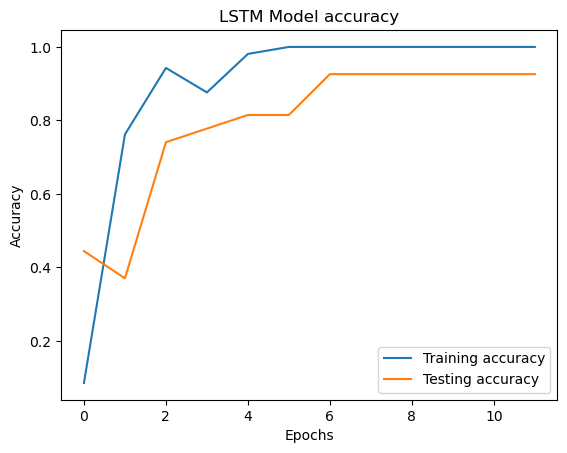

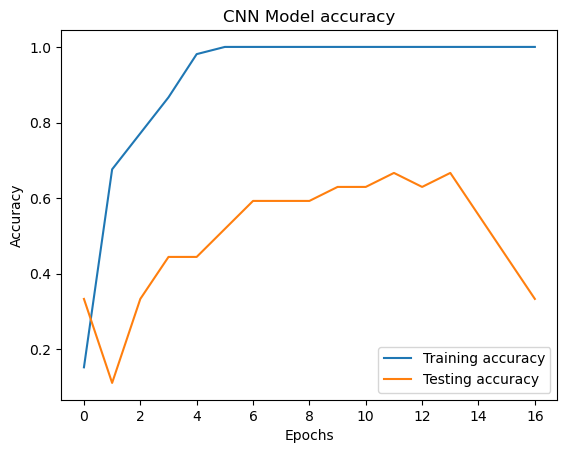

In [33]:
LSTM_eval = LSTM_model.evaluate(X_test, Y_test_one_hot)
CNN_eval = CNN_model.evaluate(X_test, Y_test_one_hot)

print(f'The accuracy of the LSTM model is: {round(LSTM_eval[1]*100, 2)}%')
print(f'The accuracy of the CNN model is: {round(CNN_eval[1]*100, 2)}%')

# Modified from: 
def plot_accuracy(model, output):
    '''Plots the accuracy of the model compared to its epoch.'''
    
    train_acc = output.history['acc']
    test_acc = output.history['val_acc']
    
    ticks = [i for i in range(len(train_acc))]

    plt.plot(ticks, train_acc, label='Training accuracy')
    plt.plot(ticks, test_acc, label='Testing accuracy')
    plt.title(f'{model} Model accuracy')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    
    return plt

plot_accuracy('LSTM', LSTM_output).show()
plot_accuracy('CNN', CNN_output).show()

Thus after 20 epochs we can see that the **CNN/LSTM** model had the higher accuracy.

Let us also vizualise the confusion matrix, along with the recall, precision and f1 score. The predicted values are the model's classification of the results and the actual values are the datasets classification of the results.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modified from: https://www.kaggle.com/code/ahmedabdelmon3m/speech-emotion-recognition?scriptVersionId=96230704&cellId=12
def print_stats(model, Y_test, Y_pred, encoder):
    '''Prints the metrics along with returning the confusion matrix plot.'''
    print(f'\n{model} Model\n{"-"*(len(model)+6)}')
    print(classification_report(Y_test , Y_pred, target_names=encoder.classes_))

    cm = confusion_matrix(Y_test, Y_pred, labels=list(range(0, 7)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
    disp.plot()
    
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.xticks(rotation = 30)
    plt.ylabel('Actual Values')
    
    return plt

# Modified from: https://www.kaggle.com/code/ahmedabdelmon3m/speech-emotion-recognition?scriptVersionId=96230704&cellId=12
def mapping(arr):
    '''Maps arr to the different emotion classes.'''
    pred = []
    for i in range(len(arr)):
        idx = 0
        max = 0
        for j in range(7):
            if arr[i][j] > max:
                max = arr[i][j]
                idx = j
        pred.append(idx)
    return pred

In [ ]:
LSTM_Y_pred = LSTM_model.predict(X_test)
CNN_Y_pred = CNN_model.predict(X_test)

print_stats('LSTM', list(Y_test), mapping(LSTM_Y_pred), lb).show()
print_stats('CNN', list(Y_test), mapping(CNN_Y_pred), lb).show()

Since the A model has higher results in the a, b, c metrics, where as the B model only has higher results in the d metric, from these results it should be conclusive to say the model A is better. But is that truly the case?


## Discussion
`Discuss the results and analysis, provide some insight about system performance, including strengths, weaknesses, limitations and possible future work.`

The A model might have better results but is it also quicker and more space efficient than the B model. <!-- is it smaller than model B -->

## Acknowledgements
Thanks to [this](https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d) notebook which helped start us write our own notebook and verbalize our thoughts. **PROBABLY REMOVE THISE, ALSO MAKE SURE TO MAKE THE ENTIRE NOTEBOOK GENERIC, NO MY, WE, US, I RUBBISH**